# Classifier 7: Naives Bayes

* Set of SL algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable
* Its predictors are conditionally independent

## Gaussian Naive Bayes (g1)
* Naive Bayes with gaussian distributions for feature values
* Fitted by finding the mean and standard deviation of each class 

## Multinomial Naive Bayes (g2)
* Naive Bayes with multinomial distributions for feature values
* Useful when using discrete data, such as frequency counts

## NB Algorithm:
1. Calculate prior probability for given class labels
2. Create a frequency table out of given historical data
3. Find likelihood probability with each attribute of each class. 4. For example, given it was Sunny weather, was the flight in time.
5. Now put these values into the Bayes formula and calculate posterior probability.
6. The class with the highest probability will be the outcome.

In [1]:
# Classifier: Naive Bayes(g) - Gaussian Naive Bayes (g1)

# 6.g1.1 Modelling - Implementing Model

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification using support vector classifier with polynomial kernel
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")

# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
gauss_NB_clf = GaussianNB()

# Fit the clasifier model
gauss_NB_clf.fit(X_train, y_train)

# make predictions from model
y_pred=gauss_NB_clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7374301675977654
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        98
           1       0.72      0.68      0.70        81

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



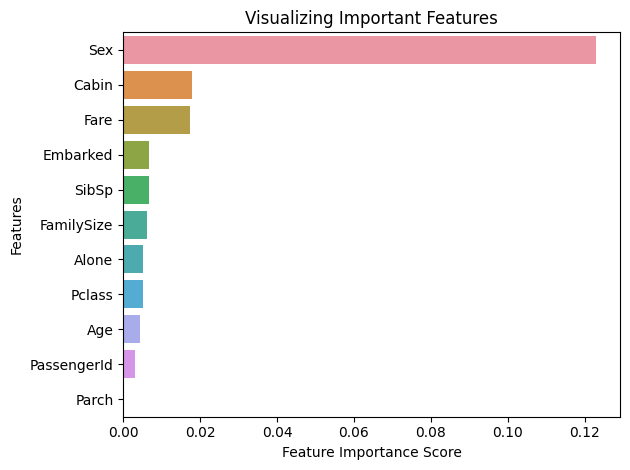

In [3]:
# 6.g1.2 Modelling - model analysis

# use permutation importance to find feature importance in Gaussian NB
from sklearn.inspection import permutation_importance

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# 78-80%

print(classification_report(y_test,y_pred))

importances = permutation_importance(gauss_NB_clf, X_train, y_train)
# print(importances.importances_mean)

# Feature Importance found through the coefficients 
feature_imp = pd.Series(np.abs(importances.importances_mean), index=processed_train.columns).sort_values(ascending=False)

# Plot out the features' importance using a barplot
# plt.figure(figuresize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout() 

In [6]:
# 6.g1.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features (determined above)
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

new_train = processed_train.drop(['Alone','Parch','Embarked', 'Pclass','Cabin'], axis=1)
new_test = processed_test.drop(['Alone','Parch','Embarked', 'Pclass', 'Cabin'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)

# fit the classifier for tuning hyperparameter
gauss_NB_clf = GaussianNB()

# Grid search CV (cross validation) to find the best hyperparameters for tuning
gauss_NB_param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1],
}

# Perform Hyperparameter Tuning
gauss_NB_ran_search = RandomizedSearchCV(gauss_NB_clf, gauss_NB_param_grid)
gauss_NB_ran_search.fit(X_train, y_train)

print(gauss_NB_ran_search.best_estimator_)

# Fit the tuned model
tuned_gauss_NB_clf=gauss_NB_ran_search.best_estimator_
tuned_gauss_NB_clf.fit(X_train, y_train)


# Tuned model make predictions on test
y_pred = tuned_gauss_NB_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/valid

GaussianNB(var_smoothing=0.001)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/valid

Tuned Accuracy: 0.7821229050279329
Your submission was successfully saved!


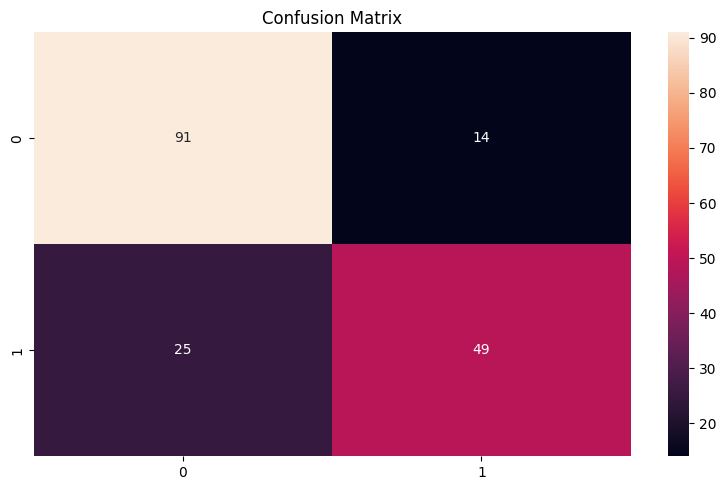

In [7]:
# 6.g1.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# Classification report
# print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_gauss_NB_clf.predict(new_test)
# Make a new column to store the predictions
new_test['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': new_test.PassengerId, 'Survived': prediction})

# Assign output to a csv file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of NB

## For Gaussian NB:
* Kaggle accuracy: 0.75837, 0.76076, 0.76076, 0.75358, 0.75358

## For Multinomial NB:
* Kaggle accuracy: 0.75598, 0.77033, 0.77033, 0.76794, 0.77033

## Gaussian NB vs Multinomial NB
* Multinomial performs better overall, especially in accuracy before model tuning
* Multinomial has more hyperparamters to tune
* Gaussian NB always provide an improvement before tune to after tune, unlike multinomial NB

## Advantages:  
* Simple, fast in processing, effective in predcting class of dataset (used in filter spam emails)
* Strong in multiclass prediction
* Good in few samples
* Easy to obtain the estimated probability for a prediction, by calculating its mean 
* Strong in text analytics problem, multi-class problems

## Disadvantages:  
* Based on the assumptions where classes are conditional independent (hard to find independent features IRL)
* Not ideal for large # of features (high cost)
* 0 frequency when a category is not captured in the training set but appears in the test data